In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import linkage, dendrogram
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("D:\mcdonalds.csv")

In [6]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [9]:
df.shape


(1453, 15)

In [11]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [12]:
# Converting columns 1-11 to a binary matrix
MD_x = df.iloc[:, :11].applymap(lambda x: 1 if x == "Yes" else 0)
MD_x.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0


In [13]:
# Column-wise means
col_means = MD_x.mean().round(2)
col_means

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [14]:
#Applying PCA
# PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)
(pca.explained_variance_ratio_)

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [15]:
# Performing Clustering
k_range = range(2, 9)
kmeans_results = [KMeans(n_clusters=k, random_state=1234).fit(MD_x) for k in k_range]

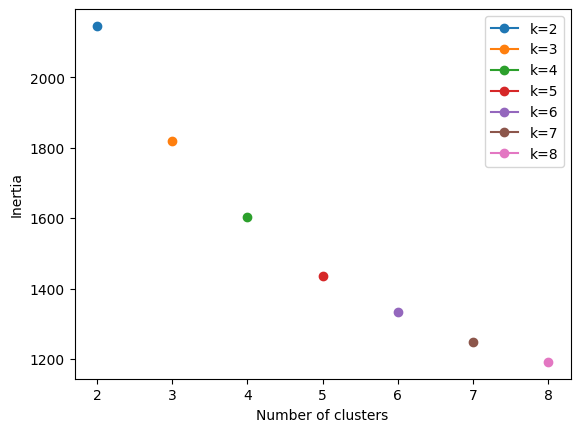

In [16]:
# Plot the explained variance ratio (substitute for stepFlexclust)
plt.figure()
for k, km in zip(k_range, kmeans_results):
    plt.plot(k, km.inertia_, 'o-', label=f'k={k}')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()

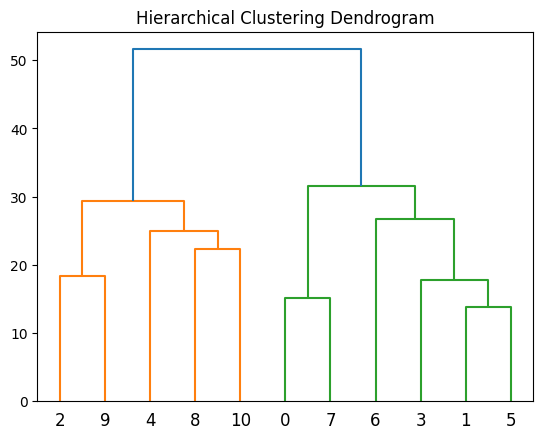

In [17]:
# Hierarchical clustering
linkage_matrix = linkage(MD_x.T, method='ward')
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

In [18]:
like_numeric = 6 - df['Like'].astype("category").cat.codes
df['Like_n'] = like_numeric

# Construct formula
formula = "Like_n ~ " + " + ".join(df.columns[:11])

# Fit the OLS model
model = ols(formula, data=df).fit()

# Summary
(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Like_n   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     24.12
Date:                Tue, 14 Jan 2025   Prob (F-statistic):           4.32e-46
Time:                        12:56:23   Log-Likelihood:                -3736.2
No. Observations:                1453   AIC:                             7496.
Df Residuals:                    1441   BIC:                             7560.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.3496      0.463     -0.755      0.450      -1.257       0.558
yummy[T.Yes]          0.3545      0.237      1.493      0.136      -0.111       0.820
convenient[T.Yes]     1.5212      0.320      4.752      0.000       0.893       2.149
spicy[T.Yes]         -0.2210      0.291     -0.760      0.448      -0.792       0.350
fattening[T.Yes]      0.4705      0.275      1.713      0.087      -0.068       1.009
greasy[T.Yes]        -0.0607      0.186     -0.326      0.745      -0.426       0.304
fast[T.Yes]          -0.2333      0.296     -0.789      0.430      -0.813       0.347
cheap[T.Yes]         -0.1434      0.253     -0.566      0.572      -0.641       0.354
tasty[T.Yes]          1.0149      0.250      4.066      0.000       0.525       1.505
expensive[T.Yes]     -0.1980      0.259     -0.764      0.445      -0.706       0.311
healthy[T.Yes]       -0.4535      0.233     -1.948      0.052      -0.910       0.003
disgusting[T.Yes]    -1.7130      0.238     -7.190      0.000      -2.180      -1.246
==============================================================================
Omnibus:                       99.906   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.698
Skew:                          -0.475   Prob(JB):                     1.34e-17
Kurtosis:                       2.382   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

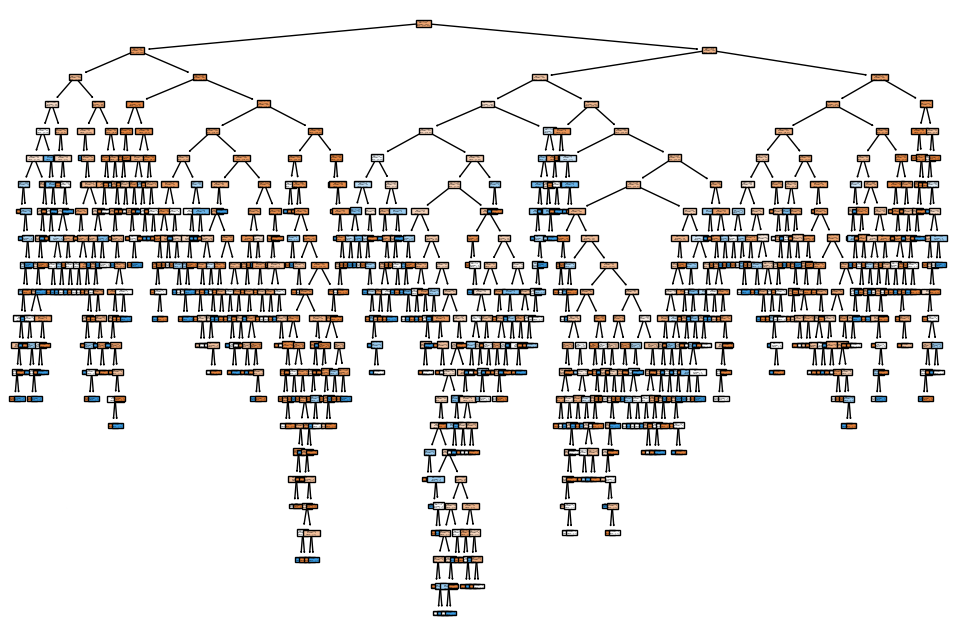

In [19]:
# Tree-based model using DecisionTreeClassifier (substitute for ctree)
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Binary encode Gender
X_tree = df[['Like_n', 'Age', 'VisitFrequency', 'Gender']]
X_tree['Gender'] = (X_tree['Gender'] == "Female").astype(int)

# Encode VisitFrequency
X_tree['VisitFrequency'] = X_tree['VisitFrequency'].astype("category").cat.codes

# Define target variable
y_tree = (kmeans_results[2].labels_ == 3).astype(int)

# Fit the Decision Tree
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X_tree, y_tree)

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X_tree.columns, filled=True)
plt.show()

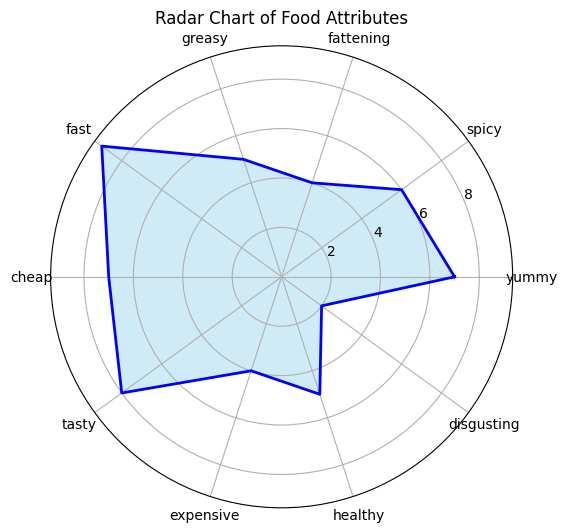

In [20]:
categories = ['yummy', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 
              'tasty', 'expensive', 'healthy', 'disgusting']
values = [7, 6, 4, 5, 9, 7, 8, 4, 5, 2]

# Radar chart setup
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
values += values[:1]  # To close the circle
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='skyblue', alpha=0.4)
ax.plot(angles, values, color='blue', linewidth=2)
ax.set_yticks([2, 4, 6, 8])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title("Radar Chart of Food Attributes")
plt.show()

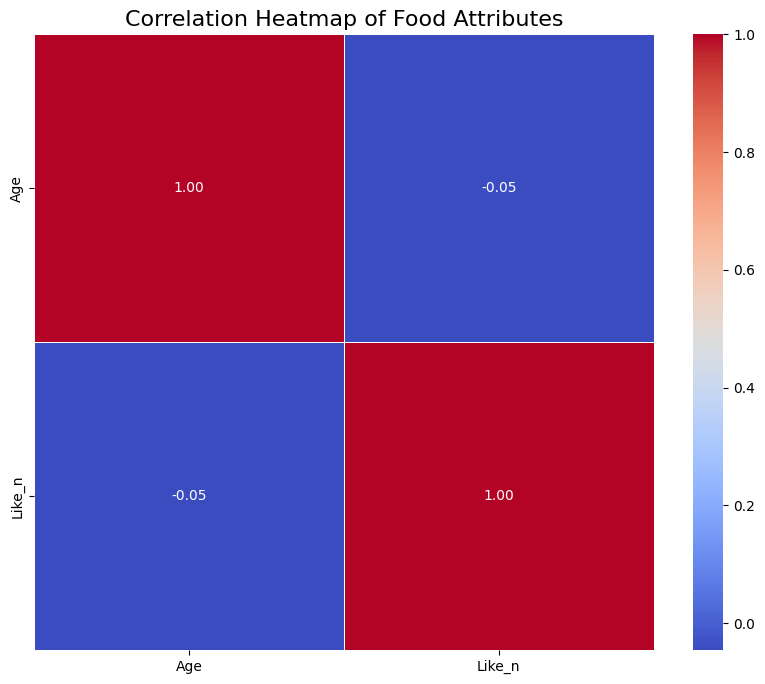

In [21]:
def plot_correlation_heatmap(df):
    numeric_df = df.select_dtypes(include=np.number)
    correlation_matrix = numeric_df.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap of Food Attributes", fontsize=16)
    plt.show()

plot_correlation_heatmap(df)

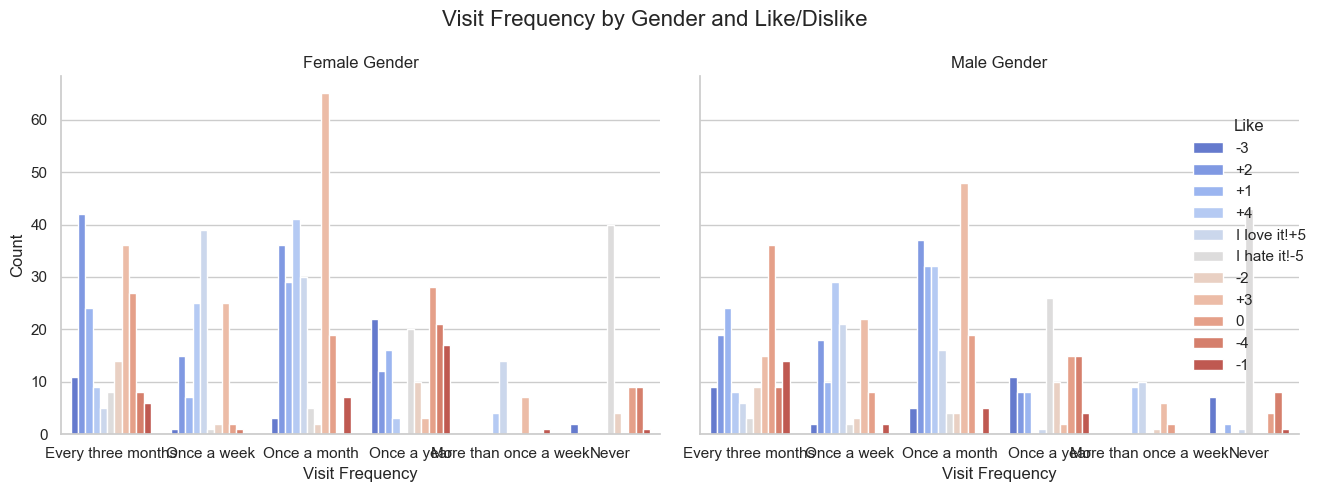

In [22]:
def plot_facet_bar_chart(df):
    sns.set(style="whitegrid")
    g = sns.catplot(
        data=df, kind="count",
        x="VisitFrequency", hue="Like", col="Gender",
        palette="coolwarm", height=5, aspect=1.2
    )
    g.set_titles("{col_name} Gender")
    g.set_axis_labels("Visit Frequency", "Count")
    g.fig.suptitle("Visit Frequency by Gender and Like/Dislike", fontsize=16)
    g.fig.tight_layout()
    plt.show()

plot_facet_bar_chart(df)


In [23]:
# Aggregate statistics
visit = MD_x.groupby(kmeans_results[2].labels_).mean()
print("Visit Frequencies:", visit)

Visit Frequencies:       yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0  0.019231    0.906593  0.082418   0.931319  0.596154  0.956044  0.901099   
1  0.020833    0.679167  0.075000   0.916667  0.708333  0.741667  0.066667   
2  0.966229    0.981238  0.084428   0.778612  0.348968  0.958724  0.923077   
3  0.873418    0.958861  0.136076   0.905063  0.607595  0.857595  0.107595   

      tasty  expensive   healthy  disgusting  
0  0.285714   0.013736  0.074176    0.329670  
1  0.079167   0.895833  0.062500    0.725000  
2  0.973734   0.018762  0.339587    0.046904  
3  0.930380   0.917722  0.208861    0.107595  


In [24]:
len(visit)

4

In [25]:
len(like_numeric)

1453

In [26]:
data = df[['VisitFrequency', 'Like_n']].dropna()
visit = data['VisitFrequency']
like_numeric = data['Like_n']

In [27]:
# Combine and drop missing data
data = pd.DataFrame({'visit': visit, 'like_numeric': like_numeric}).dropna()
visit = data['visit']
like_numeric = data['like_numeric']

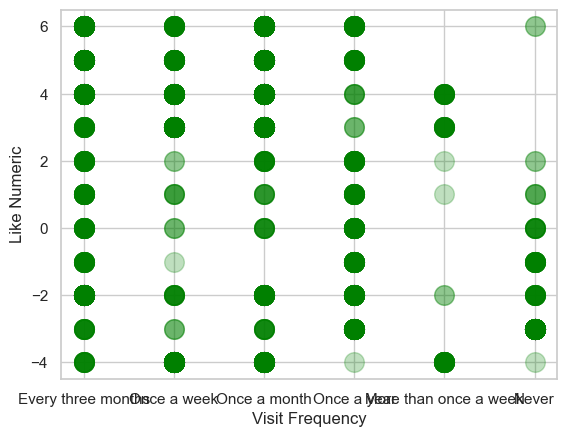

In [34]:
# Scatter plot
plt.scatter(visit, like_numeric, s=200, c='green', alpha=0.25)
plt.xlabel("Visit Frequency")
plt.ylabel("Like Numeric")
plt.show()